In [1]:
using Plots
pyplot() 

using NumericalIntegration
using CSV

using DataFrames

### Data simulated in Matlab

In [2]:
df = CSV.read("Test Run.csv");

thread = 1 warning: only found 103 / 104 columns on data row: 100. Filling remaining columns with `missing`


### Simulate Data in Julia

In [55]:
t =  range(0,stop=30,length=100)
ktrans = 0.25
ve     = 0.50
kep    = ktrans / ve

0.5

#### - Cp

In [56]:
function Cp10(t)
    #=
    Input:  time t in minutes
    THIS FUNCTION CALCULATES AN AIF WITH A SIMULATED INJECTION TIME OF 10
    SECONDS
    Injection of 10 seconds
    =#
    
    A= 30.0 #mM/min
    B= 1.0  
    C= 4.0  #min^-1
    D= 0.65 #mM
    E= 5.0  #min
    F= 0.04 #min-1
    
    #Cp_out=A.*(t.^B).*exp(-t.*C)+ D.*(1-exp(-t.*E)).* exp(-t.*F)

    return  A.*(t.^B).*exp.(-t.*C) .+ D .* (1 .- exp.(-t.*5)).* exp.(-t.*F)
    
end

function Cp40(t)
    #=
    Input:  time t in minutes
    THIS FUNCTION CALCULATES AN AIF WITH A SIMULATED INJECTION TIME OF 10
    SECONDS
    Injection of 40 seconds
    =#
    
    A= 120.0 #mM
    B= 3.0  
    C= 4.34  #min^-1
    D= 0.8 #mM 
    E= 1.0  #min
    F= 0.07 #min-1 
    

    return  A.*(t.^B).*exp.(-t.*C) .+ D .* (1 .- exp.(-t.*5)).* exp.(-t.*F)
    
end

Cp = Cp10(t);

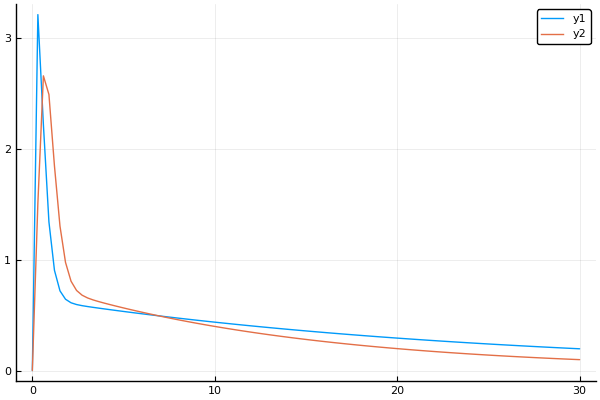

In [57]:

plot( t, Cp10(t))
plot!(t, Cp40(t))

#### - Ct

In [58]:
ktrans = 0.25
ve     = 0.50
kep    = ktrans / ve

pars = [ktrans, kep];




function Tofts(pars, t, Cp)

    ktrans=pars[1]
    kep=pars[2]
    n_points=length(t)
    c_toi=zeros(n_points,1);

    
    for k = 2:n_points
                int_t = t[k]
                expo = zeros(k,1)
                crpexp = zeros(k)




                for j = 1:k
                    dummy_time = t[j];
                    expo[j] =exp(-((kep.*(int_t-dummy_time))))
                    crpexp[j] = Cp[j]*expo[j];
                end

               t2 = t[1:k]


                crpexp_integral = integrate(t2,crpexp);
                c_toi[k] = ktrans*crpexp_integral; 
    end

return c_toi
end


Ct = Tofts(pars,t,Cp);

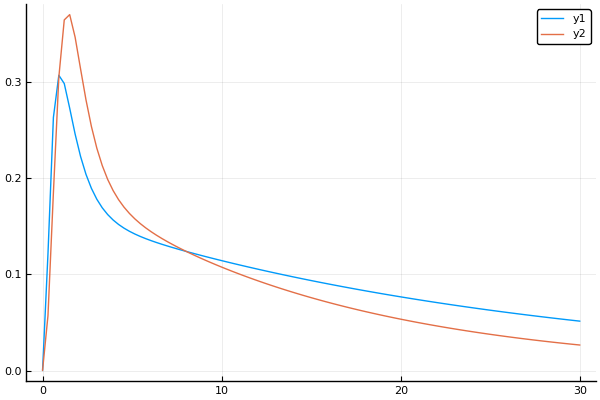

In [61]:
plot(t, Tofts([ktrans, 1],t,Cp10(t)) )
plot!(t, Tofts([ktrans, 1],t,Cp40(t)) )

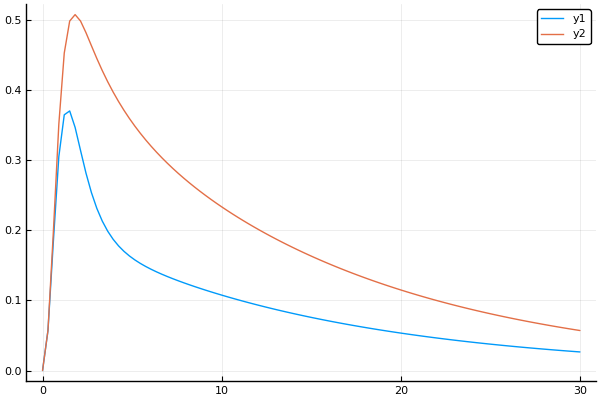

In [62]:
plot(t, Tofts([ktrans, 1],t,Cp40(t)) )
plot!(t, Tofts([ktrans, ktrans / .5],t,Cp40(t)) )